In [1]:
#import librairies
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [20]:
#5 first values of dataframe
data = pd.read_csv('/home/mric/Téléchargements/logement-encadrement-des-loyers.csv',sep = ';')
data.head()

,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,annee,ville,code_grand_quartier,geo_shape,geo_point_2d
0,3,32,Europe,2,1946-1970,non meublé,25.6,30.7,17.9,2019,PARIS,7510832,"{""type"": ""Polygon"", ""coordinates"": [[[2.312293...","48.8781476759,2.3171746113"
1,2,29,Champs-Elysées,1,Apres 1990,meublé,35.1,42.1,24.6,2019,PARIS,7510829,"{""type"": ""Polygon"", ""coordinates"": [[[2.306463...","48.8670744922,2.30865168468"
2,14,47,Bercy,4,1946-1970,non meublé,17.8,21.4,12.5,2019,PARIS,7511247,"{""type"": ""Polygon"", ""coordinates"": [[[2.391141...","48.8352090499,2.38621008421"
3,11,48,Quinze-Vingts,3,1971-1990,meublé,21.9,26.3,15.3,2019,PARIS,7511248,"{""type"": ""Polygon"", ""coordinates"": [[[2.373204...","48.8469159441,2.37440162648"
4,11,39,Porte-Saint-Martin,2,1946-1970,meublé,25.0,30.0,17.5,2019,PARIS,7511039,"{""type"": ""Polygon"", ""coordinates"": [[[2.363917...","48.8712446509,2.36150364735"


In [21]:
#list of columns of dataframe
list(data.columns)

['id_zone',
 'id_quartier',
 'nom_quartier',
 'piece',
 'epoque',
 'meuble_txt',
 'ref',
 'max',
 'min',
 'annee',
 'ville',
 'code_grand_quartier',
 'geo_shape',
 'geo_point_2d']

In [4]:
#separating training data and test data
X = pd.DataFrame(data,columns = ['nom_quartier','piece',
                                 'epoque','meuble_txt'])
Y = data['ref']

X = pd.get_dummies(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                          test_size = 0.2)

In [5]:
#training the model
regressor = RandomForestRegressor(n_estimators = 10, 
                                  random_state = 0)

regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [6]:
#predict data on test
y_pred = regressor.predict(X_test)
y_pred

array([24.8825    , 27.945     , 22.59833333, ..., 24.59733333,
       30.87583333, 25.00833333])

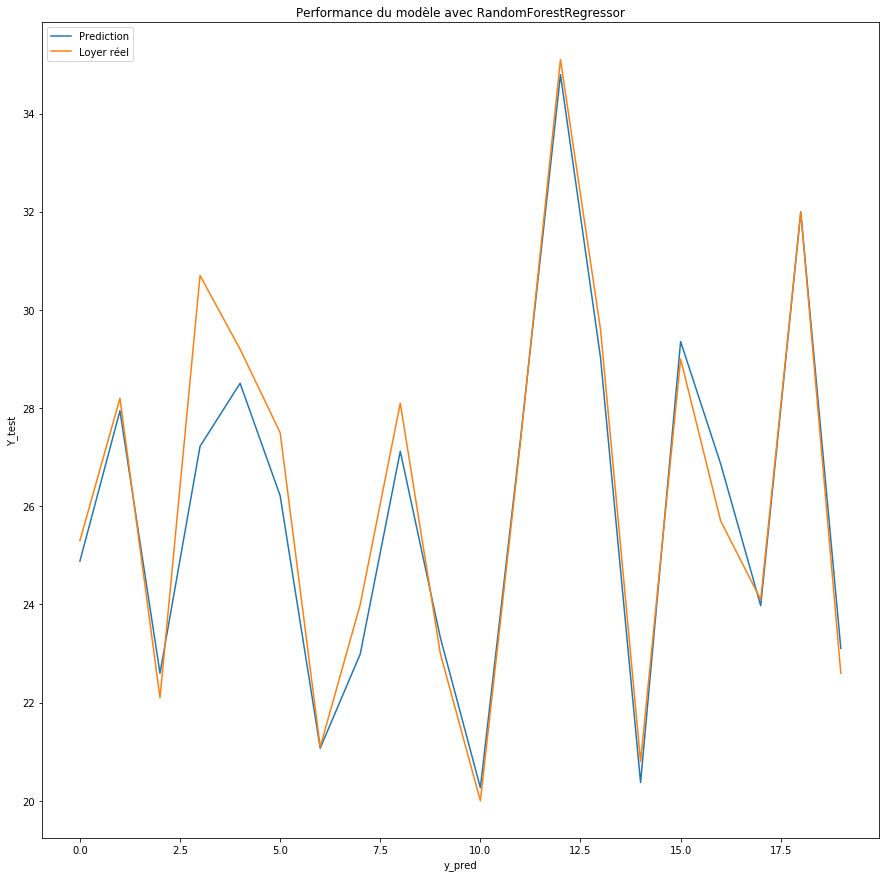

In [25]:
#Visualisation et evaluation du modèle
#Pour les 20 premières valeurs le prix de référence prédits par notre modèle et le prix attendus
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.title('Performance du modèle avec RandomForestRegressor')
plt.plot(list(y_pred)[:20],label="Prediction")
plt.plot(list(Y_test)[:20],label="Loyer réel")
plt.xlabel('y_pred')
plt.ylabel('Y_test')
plt.legend(loc="upper left")
plt.show()

In [23]:


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

lrPred = lr.predict(X_test)
lrPred

array([25.96875   , 26.14453125, 23.7265625 , ..., 22.234375  ,
       28.79296875, 25.8125    ])

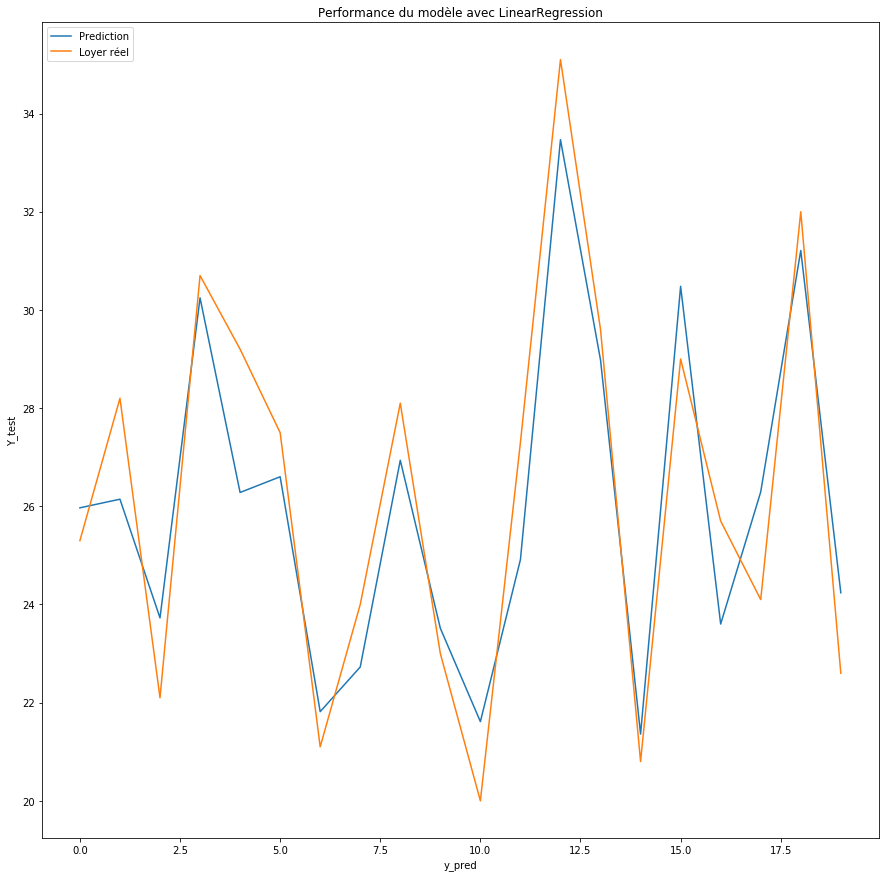

In [26]:
plt.figure(figsize=(15, 15))
plt.title('Performance du modèle avec LinearRegression')
plt.plot(list(lrPred)[:20],label="Prediction")
plt.plot(list(Y_test)[:20],label="Loyer réel")
plt.xlabel('y_pred')
plt.ylabel('Y_test')
plt.legend(loc="upper left")
plt.show()